In [90]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the Dataset
data_path = '/home/any1/Documents/I2_Data_Science/Final_Project/data/Student_Depression_Dataset.csv'
data = pd.read_csv(data_path)
print("Dataset loaded successfully!")
print(f"Dataset Shape: {data.shape}\n")
print("First 5 rows of the dataset:")
display(data.head())

Dataset loaded successfully!
Dataset Shape: (27901, 18)

First 5 rows of the dataset:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.000,Visakhapatnam,Student,5.000,0.000,8.970,2.000,0.000,5-6 hours,Healthy,B.Pharm,Yes,3.000,1.000,No,1
1,8,Female,24.000,Bangalore,Student,2.000,0.000,5.900,5.000,0.000,5-6 hours,Moderate,BSc,No,3.000,2.000,Yes,0
2,26,Male,31.000,Srinagar,Student,3.000,0.000,7.030,5.000,0.000,Less than 5 hours,Healthy,BA,No,9.000,1.000,Yes,0
3,30,Female,28.000,Varanasi,Student,3.000,0.000,5.590,2.000,0.000,7-8 hours,Moderate,BCA,Yes,4.000,5.000,Yes,1
4,32,Female,25.000,Jaipur,Student,4.000,0.000,8.130,3.000,0.000,5-6 hours,Moderate,M.Tech,Yes,1.000,1.000,No,0


In [91]:
# Initial Data Exploration
print("\nData Overview:")
print("-" * 50)
print("\n1. Data Types and Non-Null Counts:")
data.info()

print("\n2. Basic Statistical Summary:")
print(data.describe().round(2))

print("\n3. Missing Values Summary:")
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent.round(2)
})
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values('Percentage', ascending=False))


Data Overview:
--------------------------------------------------

1. Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                   


Categorical Variables Analysis:

Gender Distribution:


,Count,Percentage
Gender,,
Male,15547,55.720
Female,12354,44.280


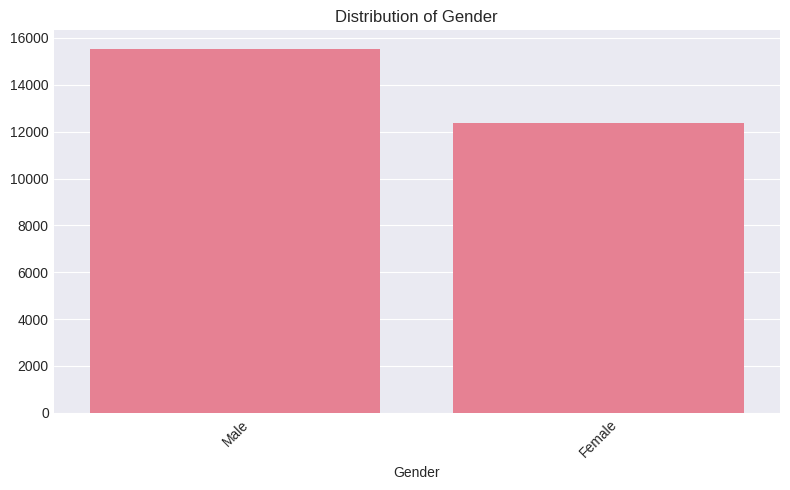


City Distribution:


,Count,Percentage
City,,
Kalyan,1570,5.630
Srinagar,1372,4.920
Hyderabad,1340,4.800
Vasai-Virar,1290,4.620
Lucknow,1155,4.140
Thane,1139,4.080
Ludhiana,1111,3.980
Agra,1094,3.920
Surat,1078,3.860


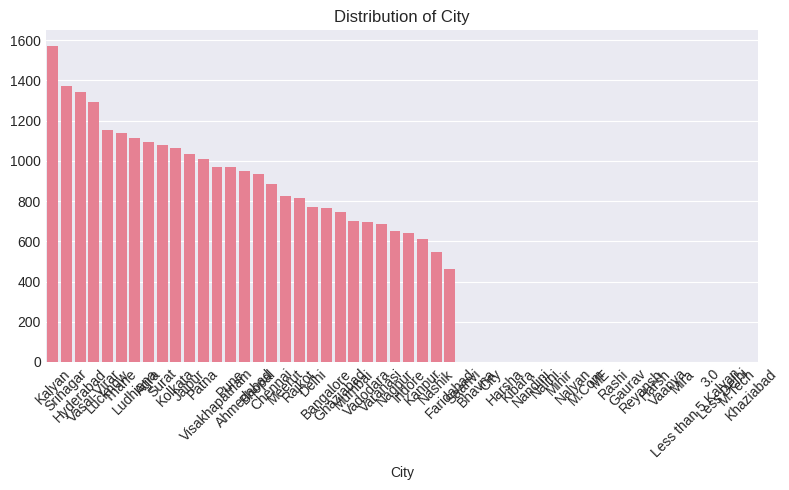


Dietary Habits Distribution:


,Count,Percentage
Dietary Habits,,
Unhealthy,10317,36.980
Moderate,9921,35.560
Healthy,7651,27.420
Others,12,0.040


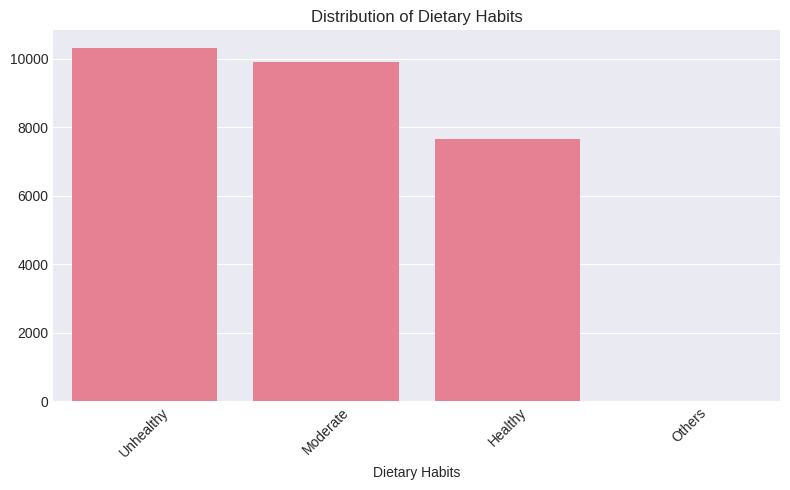


Degree Distribution:


,Count,Percentage
Degree,,
Class 12,6080,21.790
B.Ed,1867,6.690
B.Com,1506,5.400
B.Arch,1478,5.300
BCA,1433,5.140
MSc,1190,4.270
B.Tech,1152,4.130
MCA,1044,3.740
M.Tech,1022,3.660


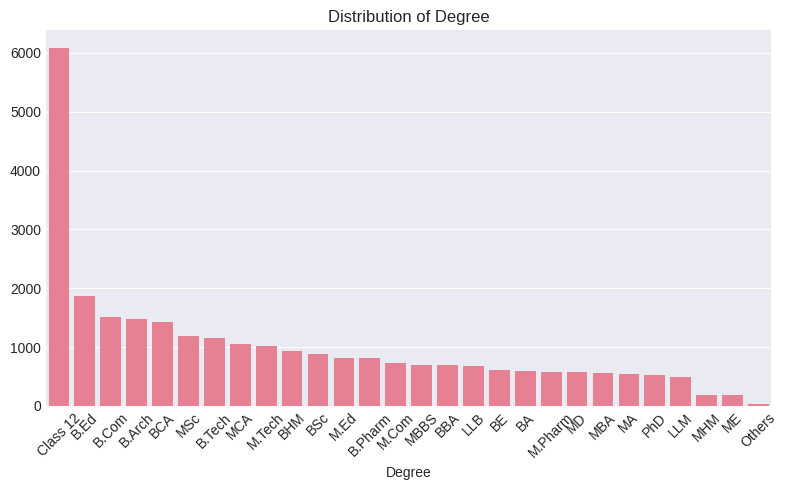


Family History of Mental Illness Distribution:


,Count,Percentage
Family History of Mental Illness,,
No,14398,51.600
Yes,13503,48.400


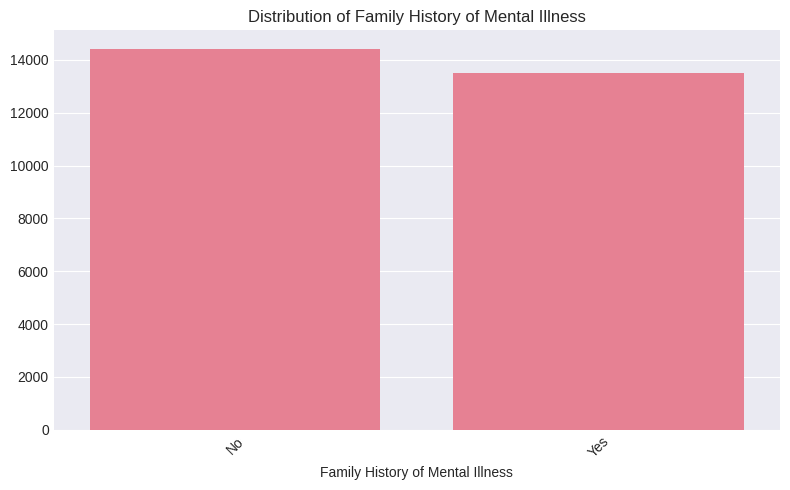


Have you ever had suicidal thoughts ? Distribution:


,Count,Percentage
Have you ever had suicidal thoughts ?,,
Yes,17656,63.280
No,10245,36.720


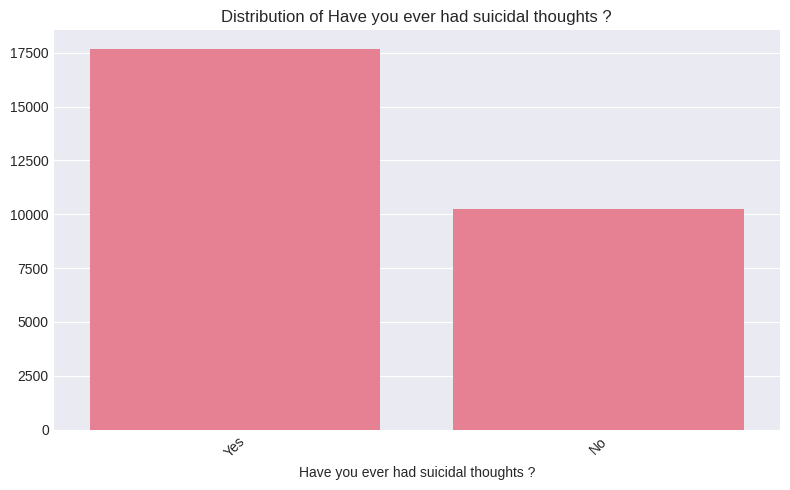

In [92]:
print("\nCategorical Variables Analysis:")
for col in categorical_columns:
    if col in data.columns:
        print(f"\n{col} Distribution:")
        value_counts = data[col].value_counts()
        percent = data[col].value_counts(normalize=True) * 100
        cat_stats = pd.DataFrame({'Count': value_counts, 'Percentage': percent.round(2)})
        display(cat_stats)
        
        # Plotting
        plt.figure(figsize=(8, 5))
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [93]:
# Handle Missing Values
data_cleaned = data.copy()
for column in data_cleaned.columns:
    missing_count = data_cleaned[column].isnull().sum()
    if missing_count > 0:
        if data_cleaned[column].dtype in ['int64', 'float64']:
            # Fill numeric columns with the median
            median_value = data_cleaned[column].median()
            data_cleaned[column].fillna(median_value, inplace=True)
            print(f"Filled {missing_count} missing values in {column} with median: {median_value:.2f}")
        else:
            # Fill categorical columns with the mode
            mode_value = data_cleaned[column].mode()[0]
            data_cleaned[column].fillna(mode_value, inplace=True)
            print(f"Filled {missing_count} missing values in {column} with mode: {mode_value}")

print(f"\nTotal Remaining Missing Values: {data_cleaned.isnull().sum().sum()}")


Filled 3 missing values in Financial Stress with median: 3.00

Total Remaining Missing Values: 0


In [94]:
# Map Sleep Duration to Numeric Values
if 'Sleep Duration' in data_cleaned.columns:
    print("\nSleep Duration Mapping:")
    sleep_mapping = {
        'Less than 5 hours': 1,
        '5-6 hours': 2,
        '7-8 hours': 3,
        'More than 8 hours': 4
    }
    data_cleaned['Sleep Duration'] = data_cleaned['Sleep Duration'].map(sleep_mapping)
    print(data_cleaned['Sleep Duration'].value_counts().sort_index())


Sleep Duration Mapping:
Sleep Duration
1.000    8310
2.000    6183
3.000    7346
4.000    6044
Name: count, dtype: int64


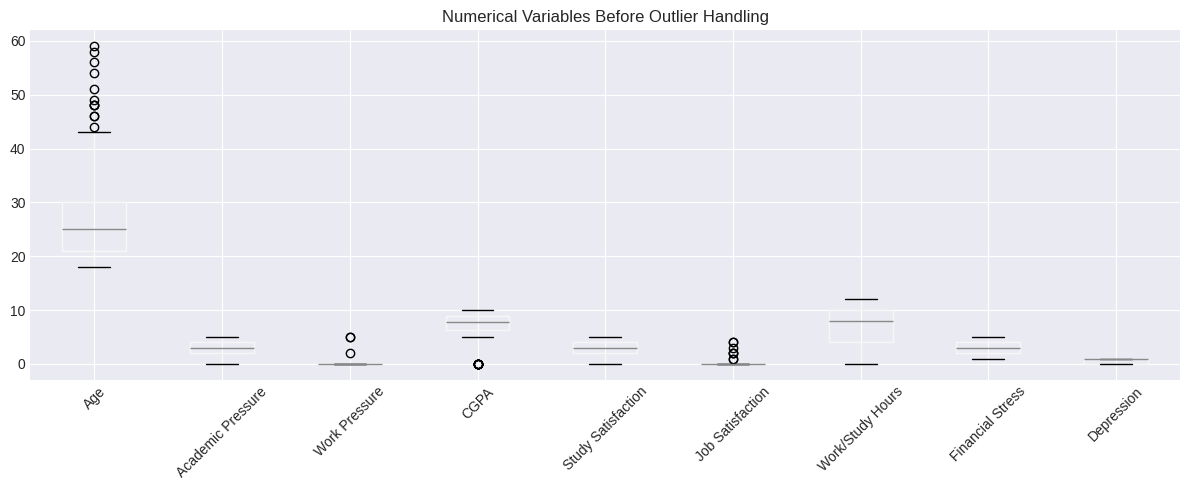

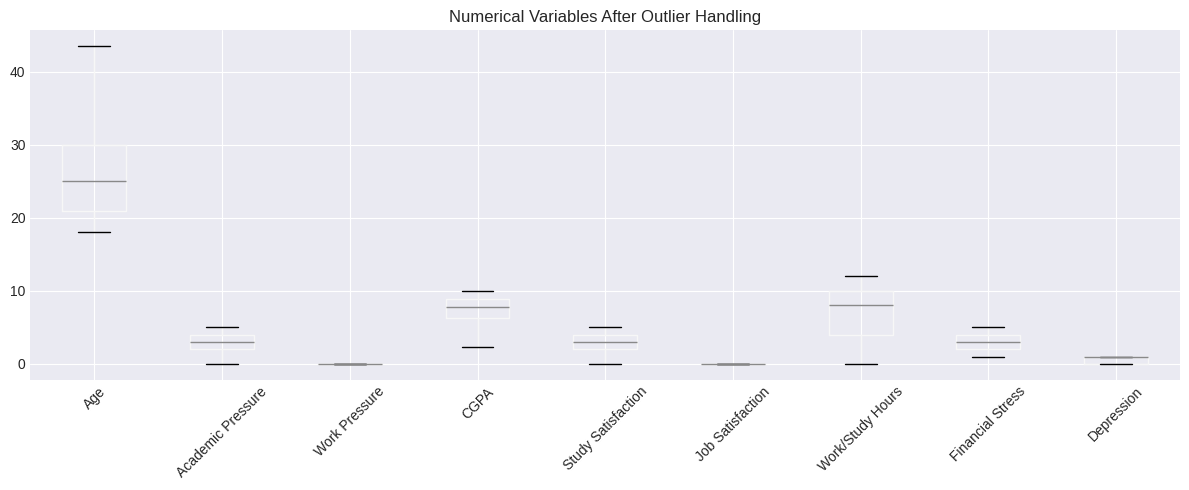

In [95]:
# Handle Outliers using IQR
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['id', 'Sleep Duration']]

# Boxplots before handling outliers
plt.figure(figsize=(12, 5))
data_cleaned[numerical_cols].boxplot()
plt.title('Numerical Variables Before Outlier Handling')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Handle outliers
for col in numerical_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_cleaned[col] = data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Boxplots after handling outliers
plt.figure(figsize=(12, 5))
data_cleaned[numerical_cols].boxplot()
plt.title('Numerical Variables After Outlier Handling')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
# Final Data Validation
print("\nFinal Data Quality Report")
print("=" * 50)
print(f"\nDataset Dimensions: {data_cleaned.shape}")
print("\nColumn Types Summary:")
print(data_cleaned.dtypes.value_counts())
print("\nNumerical Column Summary:")
display(data_cleaned[numerical_cols].describe().round(2))


Final Data Quality Report

Dataset Dimensions: (27901, 18)

Column Types Summary:
float64    9
object     7
int64      2
Name: count, dtype: int64

Numerical Column Summary:


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000
mean,25.820,3.140,0.000,7.660,2.940,0.000,7.160,3.140,0.590
std,4.890,1.380,0.000,1.470,1.360,0.000,3.710,1.440,0.490
min,18.000,0.000,0.000,2.350,0.000,0.000,0.000,1.000,0.000
25%,21.000,2.000,0.000,6.290,2.000,0.000,4.000,2.000,0.000
50%,25.000,3.000,0.000,7.770,3.000,0.000,8.000,3.000,1.000
75%,30.000,4.000,0.000,8.920,4.000,0.000,10.000,4.000,1.000
max,43.500,5.000,0.000,10.000,5.000,0.000,12.000,5.000,1.000


In [97]:
# Save Processed Dataset
output_path = '/home/any1/Documents/I2_Data_Science/Final_Project/data/processed_v1_student_depression.csv'
data_cleaned.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


Processed dataset saved successfully at: /home/any1/Documents/I2_Data_Science/Final_Project/data/processed_v1_student_depression.csv
